# Podstawowe wykresy dla sprzedaży

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
df = pd.read_excel('./data/r02/dane_cw.xlsx', sheet_name='wykres_kombi')

In [14]:
df.head()

,Miesiąc,Sprzedaż rzeczywista,Sprzedaż planowana
0,Styczeń,1331,1417
1,Luty,1606,1457
2,Marzec,1624,1488
3,Kwiecień,1225,992
4,Maj,1202,1339


## Wykres słupkowy
Wykres słupkowo dla dwóch kategroii

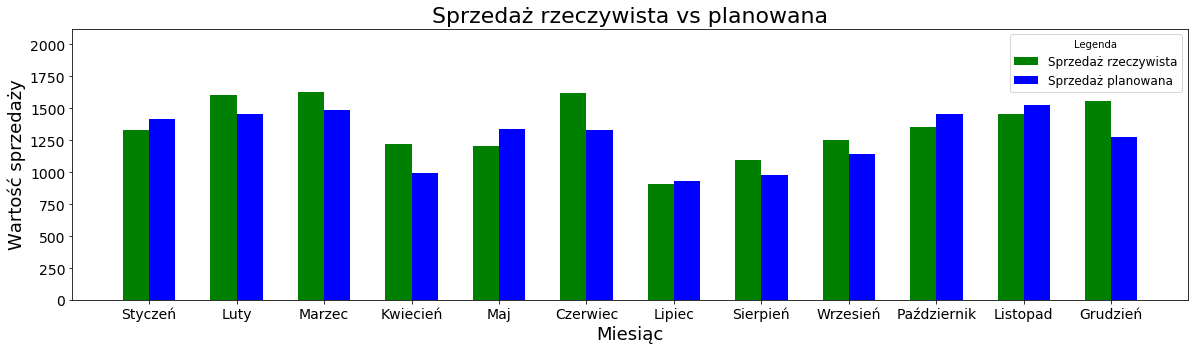

In [97]:
index = np.arange(len(df['Miesiąc']))
width = 0.3

plt.figure(figsize=(20,5))
plt.bar(index, df['Sprzedaż rzeczywista'],color='green', label = 'Sprzedaż rzeczywista', width = 0.3)
plt.bar(index+width,df['Sprzedaż planowana'],color='blue', label = 'Sprzedaż planowana',  width = 0.3)
plt.ylim(top=df['Sprzedaż rzeczywista'].max()+500)

plt.title('Sprzedaż rzeczywista vs planowana', fontsize=22)
plt.xlabel('Miesiąc', fontsize=18 )
plt.ylabel('Wartość sprzedaży', fontsize=18)
plt.xticks(index + width/2 , df['Miesiąc'], fontsize=14)
plt.yticks(fontsize=14)


plt.legend(loc='upper right', fontsize = 12, title = 'Legenda')
plt.show();

## Wykres słupkowo-liniowy
Wykres obrazujący powyższą sytuacje, tylko wartośc planowana jest linią

In [325]:
def bar_line_chart():
    plt.figure(figsize=(20,6))
    plt.bar(df['Miesiąc'], df['Sprzedaż rzeczywista'],color='green', label = 'Sprzedaż rzeczywista', width = 0.5)
    plt.plot(df['Miesiąc'],df['Sprzedaż planowana'],color='blue', label = 'Sprzedaż planowana',  linewidth=4)
    plt.ylim(top=df['Sprzedaż rzeczywista'].max()+500)

    plt.title('Sprzedaż rzeczywista vs planowana', fontsize=22)
    plt.xlabel('Miesiąc', fontsize=18 )
    plt.ylabel('Wartość sprzedaży', fontsize=18)
    plt.xticks(df['Miesiąc'], fontsize=14)
    plt.yticks(fontsize=14)


    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), fontsize = 14, ncol=5);
    plt.show();

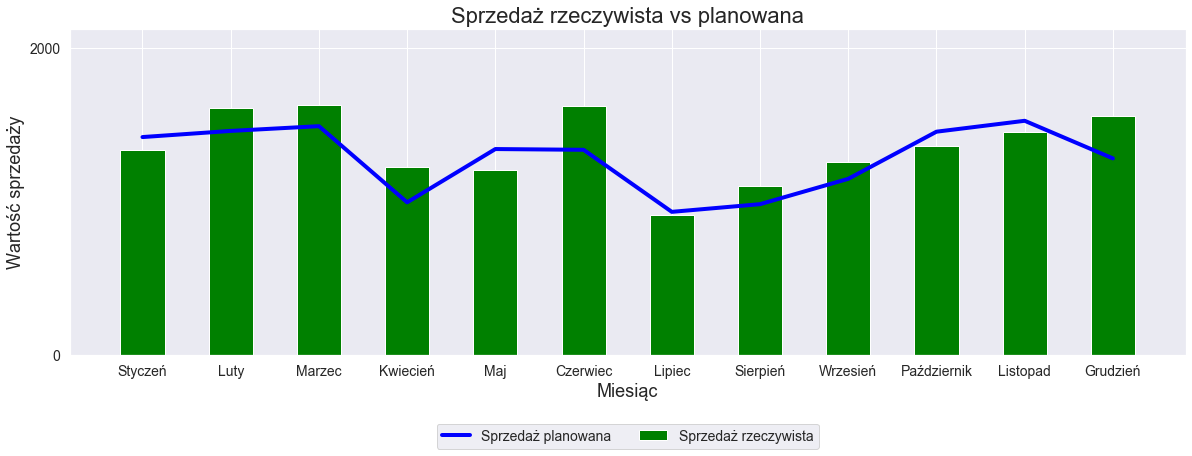

In [326]:
bar_line_chart()

#### Dodanie etykiet

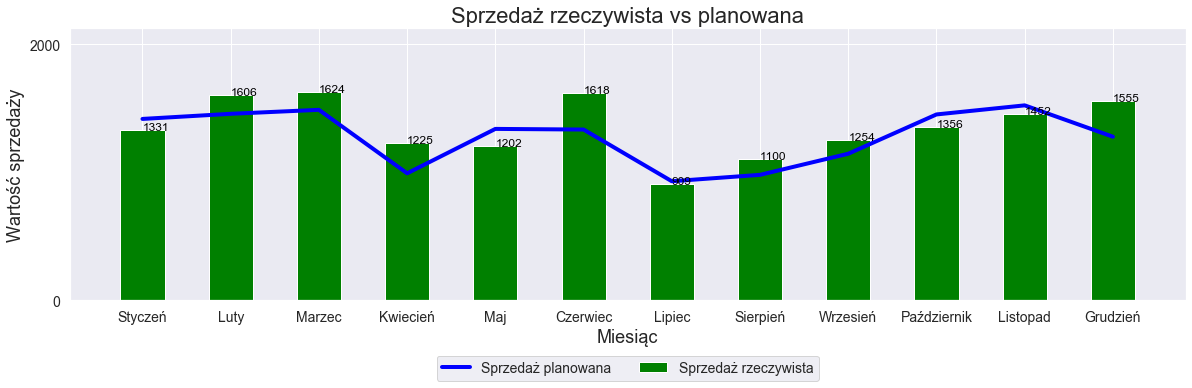

In [327]:
fig = plt.figure(figsize=(20,5))

plt.bar(df['Miesiąc'], df['Sprzedaż rzeczywista'],color='green', label = 'Sprzedaż rzeczywista', width = 0.5)
plt.plot(df['Miesiąc'],df['Sprzedaż planowana'],color='blue', label = 'Sprzedaż planowana',  linewidth=4)
plt.ylim(top=df['Sprzedaż rzeczywista'].max()+500)

plt.title('Sprzedaż rzeczywista vs planowana', fontsize=22)
plt.xlabel('Miesiąc', fontsize=18 )
plt.ylabel('Wartość sprzedaży', fontsize=18)
plt.xticks(df['Miesiąc'], fontsize=14)
plt.yticks(fontsize=14)

for i, rows in df.iterrows():
    plt.annotate(rows["Sprzedaż rzeczywista"], xy=(i, rows["Sprzedaż rzeczywista"]), color="black",fontsize= 12)


plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), fontsize = 14, ncol=5);
plt.show();

### Plan vs wykonanie
Wykres pokazujący procentowe wykonanie planu

In [136]:
df['Wykonanie']=df['Sprzedaż rzeczywista']/df['Sprzedaż planowana']*100
df

,Miesiąc,Sprzedaż rzeczywista,Sprzedaż planowana,Wykonanie
0,Styczeń,1331,1417,93.930840
1,Luty,1606,1457,110.226493
2,Marzec,1624,1488,109.139785
3,Kwiecień,1225,992,123.487903
4,Maj,1202,1339,89.768484
5,Czerwiec,1618,1334,121.289355
6,Lipiec,909,930,97.741935
7,Sierpień,1100,980,112.244898
8,Wrzesień,1254,1145,109.519651
9,Październik,1356,1452,93.388430


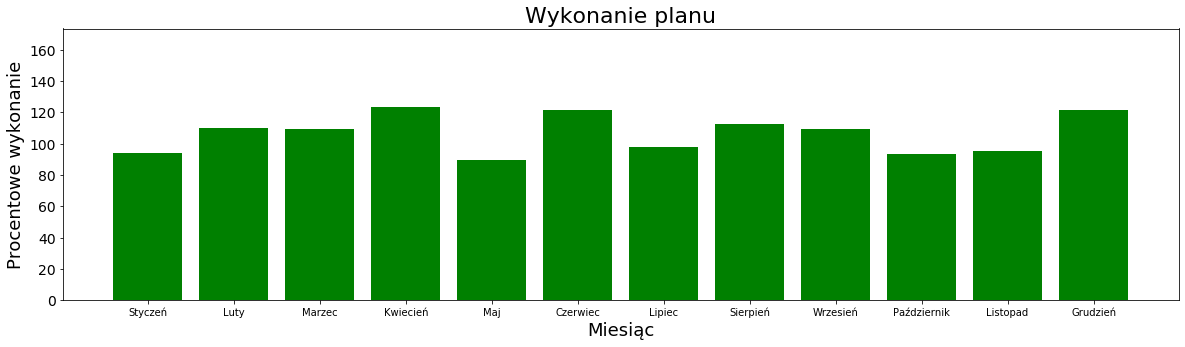

In [146]:
plt.figure(figsize=(20,6))
plt.bar(df['Miesiąc'], df['Wykonanie'], color='green', label = 'Sprzedaż rzeczywista', linewidth = 5)
plt.ylim(top=df['Wykonanie'].max()+50, bottom=0)

plt.title('Wykonanie planu', fontsize=22)
plt.xlabel('Miesiąc', fontsize=18 )
plt.ylabel('Procentowe wykonanie', fontsize=18)

plt.yticks(fontsize=14)

plt.show();

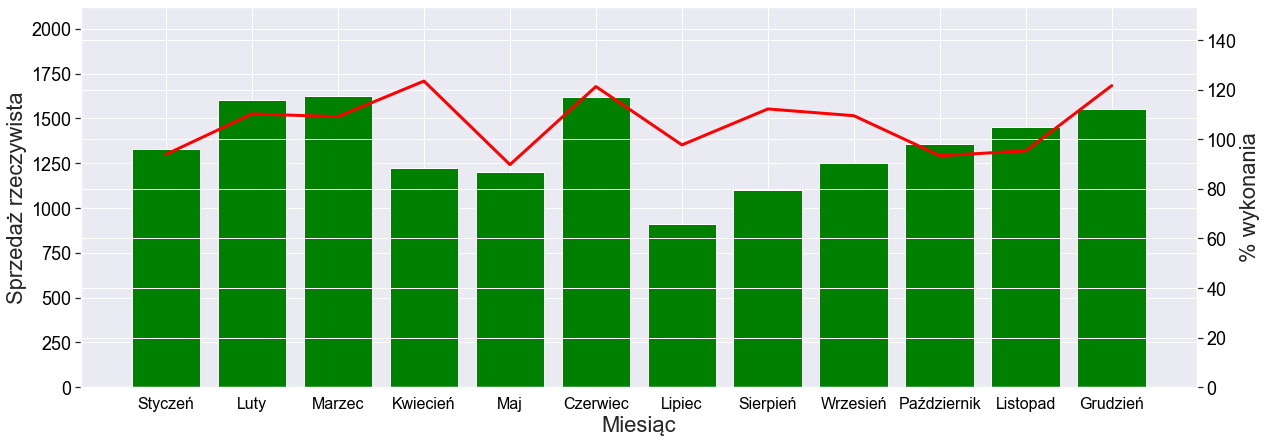

In [340]:
fig, ax1 = plt.subplots(figsize=(20,7))


ax1.set_xlabel('Miesiąc', fontsize=22)
ax1.set_ylabel('Sprzedaż rzeczywista', fontsize=22)
ax1.bar(df['Miesiąc'], df['Sprzedaż rzeczywista'], color='green')
ax1.tick_params(axis='y', labelcolor='black', labelsize= 18)
ax1.tick_params(axis='x', labelcolor='black', labelsize= 16)
ax1.set_ylim(top = df['Sprzedaż rzeczywista'].max()+500, bottom = 0)

ax2 = ax1.twinx()  

ax2.set_ylabel('% wykonania',  fontsize=22) 
ax2.plot(df['Miesiąc'], df['Wykonanie'], color='red', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='black',  labelsize= 18)
ax2.set_ylim(top = df['Wykonanie'].max()+30, bottom = 0)

plt.show()

## Sprzedaż wg kategorii
Dane są inne niż poprzednie,ale chodzi o pokazanie typów i możliwosci wykresów

In [180]:
df2 = pd.read_excel('./data/r02/dane_cw.xlsx', sheet_name='produkty')
df2.head(10)

,Tydzień,Ciasta,Książki,Lasagne,Sprite,Pizza
0,1,857,5820,3374,3036,2564
1,2,1050,8656,3821,3589,2615
2,3,863,6749,2857,3279,2512
3,4,933,5580,3284,3981,2705
4,5,905,8534,3923,3411,2386
5,6,901,6837,3837,3484,2977
6,7,597,7794,2713,3498,2946
7,8,1185,8708,3375,3169,2729
8,9,565,8892,3674,3660,2977
9,10,964,6338,2640,3797,2322


In [208]:
df3 = pd.melt(df2, id_vars='Tydzień', value_vars=['Ciasta','Książki','Lasagne','Sprite','Pizza'])
df3.rename(columns={'variable':'Produkt','value':'Sprzedaż'},inplace=True)
df3.sample(10)

,Tydzień,Produkt,Sprzedaż
46,17,Książki,6781
57,28,Książki,5845
41,12,Książki,5468
48,19,Książki,7763
39,10,Książki,6338
70,11,Lasagne,2926
85,26,Lasagne,3716
65,6,Lasagne,3837
109,20,Sprite,3687
92,3,Sprite,3279


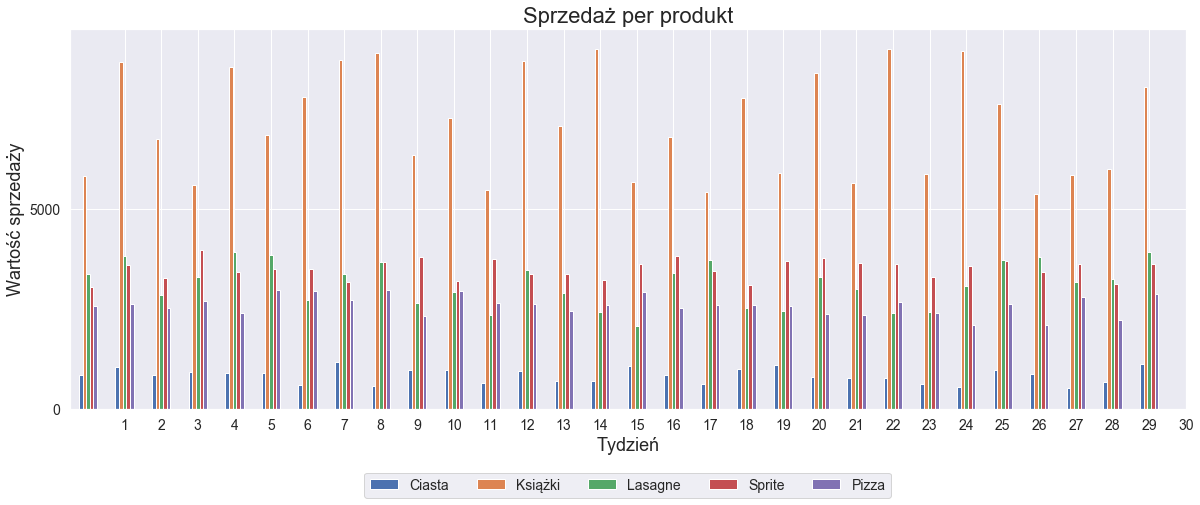

In [345]:
##plt.rcParams['legend.title_fontsize'] = 'xx-small'

df2.set_index('Tydzień').plot(kind='bar', figsize=(20, 7))

plt.ylim(top=df3['Sprzedaż'].max()+500)

plt.title('Sprzedaż per produkt', fontsize=22)
plt.xlabel('Tydzień', fontsize=18 )
plt.ylabel('Wartość sprzedaży', fontsize=18)
plt.xticks(df2['Tydzień'], fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.20), fontsize = 14, ncol=5);


Powyższy wykres jest mało czytelny przy takiej ilości kategorii i ilości tygodni. Można zastosować wykres skumulowany

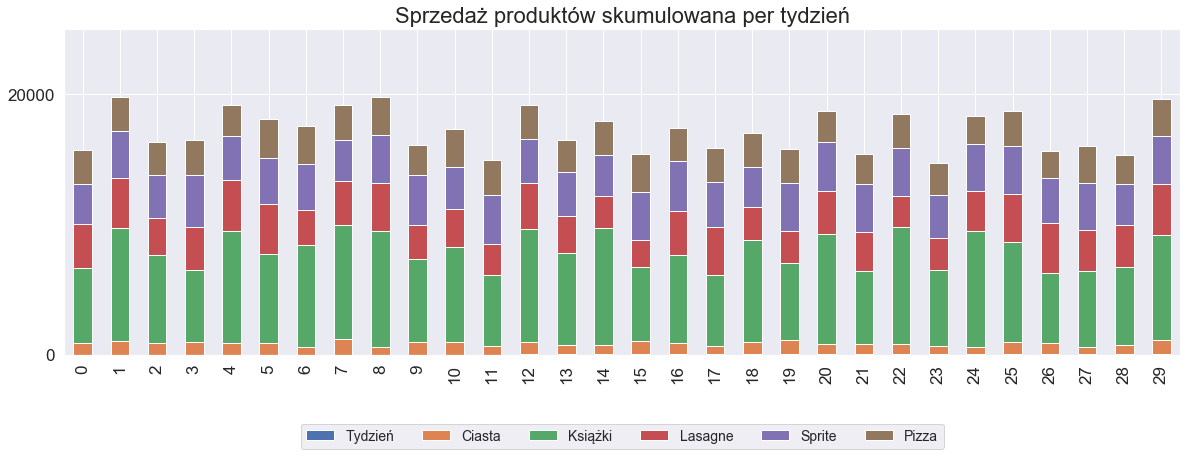

In [346]:
df2.plot(kind='bar',
         stacked=True,
         legend='Produkt',
         figsize=(20, 6),
         fontsize = 17,
         ylim=[0,25000]);

plt.title('Sprzedaż produktów skumulowana per tydzień', fontsize=22)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), fontsize = 14, ncol=6);